In [121]:
import numpy as np
import matplotlib.pyplot as plt

<p>**This content is based on <a href="http://cs231n.stanford.edu"> Stanford CS231n </a>course**</p>

In [235]:
import numpy as np

class KNearestNeighbor(object):
  """ a kNN classifier with L2 distance """

  def __init__(self):
    pass

  def train(self, X, y):
    
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1, num_loops=1):

    if num_loops == 0:
      dists = self.compute_distances_no_loops(X)
    elif num_loops == 1:
      dists = self.compute_distances_one_loop(X)
    elif num_loops == 2:
      dists = self.compute_distances_two_loops(X)
    else:
      raise ValueError('Invalid value %d for num_loops' % num_loops)

    return self.predict_labels(dists, k=k)

  def compute_distances_two_loops(self, X):
    
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      for j in range(num_train):
        
        dists[i, j] = np.sqrt(np.sum((X[i, :] - self.X_train[j, :]) **2))
        
    return dists

  def compute_distances_one_loop(self, X):
    
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
    
      dists[i, :] = np.sqrt(np.sum((self.X_train - X[i, :])**2, axis=1))
     
    return dists

  def compute_distances_no_loops(self, X):

    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train)) 
    
    dists = np.sqrt((-2 * np.dot(X, self.X_train.T)) + np.sum(X**2, axis=1, keepdims=True) + np.sum(self.X_train**2, axis=1))
    
    return dists

  def predict_labels(self, dists, k=1):
    
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    # print(dists.shape)
    for i in range(num_test):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.
      closest_y = []
      #########################################################################
      # TODO:                                                                 #
      # Use the distance matrix to find the k nearest neighbors of the ith    #
      # testing point, and use self.y_train to find the labels of these       #
      # neighbors. Store these labels in closest_y.                           #
      # Hint: Look up the function numpy.argsort.                             #
      #########################################################################
        
      k_nearest_idxs = np.argsort(dists[i, :])[:k]

     
      closest_y = self.y_train[k_nearest_idxs]
      if i ==1 and k==5:
          print(dists[1, :])
          print()
          print(np.argsort(dists[1, :]))
          print()
          print(np.argsort(dists[1, :])[:k])
          print(self.y_train)
          print(k_nearest_idxs)
          print("closest y",closest_y)
          print()
          print(np.bincount(closest_y))
          print()
          print(np.argmax(np.bincount(closest_y)))
           
      #########################################################################
      # TODO:                                                                 #
      # Now that you have found the labels of the k nearest neighbors, you    #
      # need to find the most common label in the list closest_y of labels.   #
      # Store this label in y_pred[i]. Break ties by choosing the smaller     #
      # label.                                                                #
      #########################################################################
      
      y_pred[i] = np.argmax(np.bincount(closest_y))

    return y_pred

In [236]:
# #Loading the Data
# iris= load_iris()
 
# # Store features matrix in X
# X= iris.data
# #Store target vector in 
# y= iris.target 


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df[df['target'] != 0]  # filter out the first class
X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['target'].values - 1  # convert labels to 0/1




#Creating the training Data
train_idx = int(X.shape[0]* .8)
X_train = X[:train_idx]
y_train = y[:train_idx]

X_test = X[train_idx:]
y_test = y[train_idx:]

In [237]:
# find hyperparameters that work best on the validation set
validation_accuracies = []
for k in [1, 3, 5, 10, 20, 50, 100]:

  # use a particular value of k and evaluation on validation data
  nn = KNearestNeighbor()
  nn.train(X_train, y_train) 
  # here we assume a modified NearestNeighbor class that can take a k as input
  Yval_predict = nn.predict(X_test, k = k)
  acc = np.mean(Yval_predict == y_test)
  print ('accuracy: %.4f' %(acc))

  # keep track of what works on the validation set
  validation_accuracies.append((k, acc))

accuracy: 0.9500
accuracy: 0.9500
[1.80277564 1.96468827 1.58113883 2.5        1.86815417 2.02484567
 1.74642492 3.25729949 1.93132079 2.57099203 3.06757233 2.25610283
 2.6        1.80277564 2.88617394 2.0880613  1.96468827 2.50798724
 1.96468827 2.65706605 1.61245155 2.5        1.58113883 1.87882942
 2.21359436 2.0880613  1.70880075 1.43178211 1.96468827 3.06757233
 2.7513633  2.87923601 2.62488095 1.36014705 1.96468827 1.94164878
 1.77200451 2.11896201 2.40416306 2.5        2.15406592 1.8973666
 2.52982213 3.25729949 2.30867928 2.34093998 2.30867928 2.21359436
 3.51710108 2.40416306 0.64031242 1.30384048 0.50990195 0.82462113
 0.63245553 0.2236068  1.92353841 0.2236068  0.63245553 0.58309519
 1.3        1.1045361  0.90553851 1.4        1.36014705 1.14017543
 0.92195445 0.36055513 0.58309519 1.48660687 0.76157731 1.5
 0.3        1.5132746  0.70710678 0.4472136  1.61245155 1.5132746
 0.80622577 0.72111026]

[55 57 72 67 75 52 68 59 58 54 50 74 79 70 78 53 62 66 61 65 60 51 33 64
 63 27

In [125]:
validation_accuracies[0]

(1, 0.8333333333333334)

In [247]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20,35, 50,62,75,90, 100]

num_data = len(y_train)
ind_split = np.array_split(np.arange(num_data), num_folds)
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
#print np.shape(X_train_folds)
k_to_accuracies = {}
for k in k_choices:
    #print 'Processing kNN for k = %d' %(k)
    k_to_accuracies[k] = []
    for j in range(0,num_folds):
        X_train_v = np.vstack(X_train_folds[0:j]+X_train_folds[j+1:])
        y_train_v = np.hstack(y_train_folds[0:j]+y_train_folds[j+1:])
        
        X_test_v = X_train_folds[j]
        y_test_v = y_train_folds[j]
        
        nn.train(X_train_v, y_train_v)
        dists_cv = nn.compute_distances_no_loops(X_test_v)
        dists_cv = np.asarray(dists_cv)
        #print 'predicting now'
        y_test_pred = nn.predict_labels(dists_cv, k)
        num_correct = np.sum(y_test_pred == y_test_v)
        accuracy = float(num_correct) / float(len(y_test_v))
        k_to_accuracies[k].append(accuracy)
        
        


# Print out the computed accuracies
acc = 0
best_k=None
for k in sorted(k_to_accuracies):
    res = np.mean(k_to_accuracies[k])
    if res>acc:
        best_k = k
        acc = res
    print ('k = %d, accuracy = %f' % (k, res))

print("\nBest K: ",best_k,"Acc: %.4f" %acc)

[0.         0.64031242 0.         0.72111026 0.42426407 0.53851648
 0.4        0.36055513 0.28284271 0.14142136 0.31622777 0.53851648
 0.         1.11803399 0.80622577 0.94339811 0.67082039 0.60827625
 0.         0.1        0.2        0.2236068  0.4472136  0.53851648
 0.31622777 0.14142136 0.58309519 1.3        0.36055513 0.42426407
 0.36055513 0.28284271 1.55241747 0.4472136  1.80277564 0.72111026
 1.52315462 1.14017543 1.47648231 2.18403297 0.2        1.82482876
 1.33416641 1.88679623 0.78102497 0.89442719 1.16619038 0.70710678
 1.08166538 1.13137085 1.04403065 2.30867928 2.52982213 0.5
 1.44222051 0.64031242 2.25610283 0.5        1.34164079 1.52970585
 0.42426407 0.5        1.25299641 1.30384048]

[ 0  2 18 12 19 25  9 40 20 21 31  8 10 24  7 30 28  6 29 60  4 33 22 53
 61 57 11 23  5 26 17  1 55 16 47 35  3 44 14 45 15 50 48 13 49 37 46 62
 27 63 42 58 54 38 36 59 32 34 41 43 39 56 51 52]

[ 0  2 18 12 19]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 

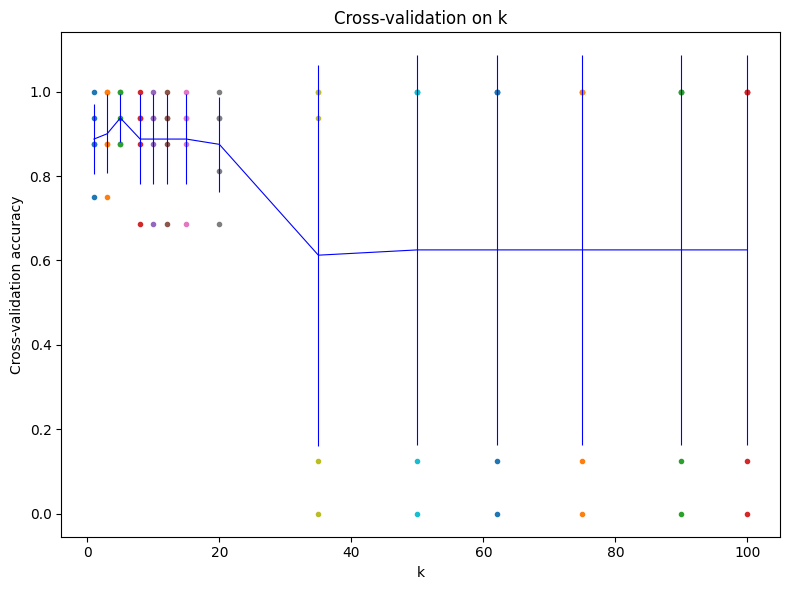

In [248]:
plt.figure(figsize=(8,6))
for k in k_choices:
  accuracies = k_to_accuracies[k]
  plt.scatter([k] * len(accuracies), accuracies,marker='.')

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])

plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std,color='blue',lw=.8,capthick=2.0)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

plt.show()


In [249]:
def hstack(a,b):
    res = []
    if isinstance(a[0], np.ndarray):
        a = np.squeeze(a, axis=-1)
    if isinstance(b[0], np.ndarray):  
        b = np.squeeze(b, axis=-1)
    for i in range(len(a)):
        res.append([a[i],b[i]])
    return np.array(res)


In [250]:
#hstack([1,2,3],[4,5,6])
hstack(a,b)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [252]:
x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [253]:
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()],5)
Z = Z.reshape(xx.shape)

[4.3833891  4.21047503 4.60001087 3.67805655 4.30767919 4.16750525
 4.42878087 2.93293368 4.26568869 3.60417813 3.13019169 3.91970662
 3.62465171 4.3833891  3.28878397 4.09024449 4.21047503 3.72372126
 4.21047503 3.54120036 4.5784386  3.67805655 4.60001087 4.34673441
 3.97141033 4.09024449 4.48130561 4.74427023 4.21047503 3.13019169
 3.4426879  3.32777704 3.55950839 4.81727101 4.21047503 4.23533942
 4.40500851 4.06941028 3.7757251  3.67805655 4.05093816 4.28556881
 3.65760851 2.93293368 3.87351262 3.85410171 3.87351262 3.97141033
 2.65858985 3.7757251  5.93701103 4.89449691 5.71840013 5.35033644
 5.65173425 6.39344195 4.26240542 6.03175762 5.54455589 6.03126023
 4.9240329  5.08646242 5.33555058 4.82888186]

[48  7 43 10 29 14 31 30 19 32  9 12 42 39  3 21 17 38 49 45 46 44 11 24
 47 40 37 25 15  5 18 16 28 34  1 35 56  8 41  4 23  0 13 36  6 26 20  2
 22 27 33 63 51 60 61 62 53 58 54 52 50 59 57 55]

[48  7 43 10 29]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

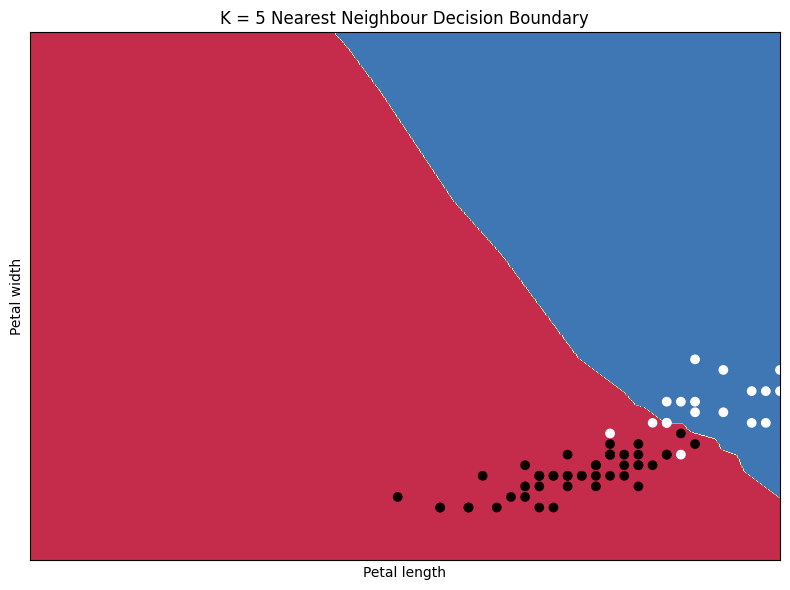

In [255]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='hot')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('K = 5 Nearest Neighbour Decision Boundary')
plt.show()
